In [28]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
richard_filepath = "/Users/richie/Projects/SGC-K/data/data_weather_stations_2024.csv"
maite_filepath = '/Users/maite/Downloads/Historische Wetterdaten_täglich.csv'


ws = pd.read_csv(richard_filepath) 
#dwd = pd.read_csv('/Users/maite/Downloads/Historische Wetterdaten_täglich.csv', sep=';')

In [30]:
ws.head()


,entity_id,name,dateobserved,atmosphericpressure,precipitation,relativehumidity,temperature,winddirection,windspeedavg,windspeedmax,windspeedmin,surfacetemperaturewintersense,temperaturewintersense
0,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d35...,Marktstätte,2024-12-31 23:58:54.822+01,982.5,0.22,98.2,-1.6,28,0.4,1.1,0.1,0.27,-1.6309
1,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d2f...,Herose-Park,2024-12-31 23:55:11.541+01,982.3,0.09,100.0,-1.3,203,0.6,1.0,0.1,NaN,NaN
2,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d34...,Mainaustrasse,2024-12-31 23:53:21.901+01,981.2,0.04,100.0,-1.6,232,0.2,0.3,0.0,NaN,NaN
3,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d34...,Fähre Staad,2024-12-31 23:52:12.075+01,982.0,82.60,100.0,-1.7,260,0.2,0.6,0.0,NaN,NaN
4,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d2f...,Hörnle,2024-12-31 23:51:25.294+01,981.7,0.00,100.0,-1.9,253,0.2,0.4,0.1,NaN,NaN


In [31]:
#new variables: date, time, hour & week_of_year
ws['dateobserved'] = pd.to_datetime(ws['dateobserved'].str.split('[.+]', n=1).str[0])

ws['date'] = ws['dateobserved'].dt.date
ws['time'] = ws['dateobserved'].dt.time
ws['hour'] = ws['dateobserved'].dt.hour
ws['week_of_year'] = ws['dateobserved'].dt.isocalendar().week

ws['entity_id'] = ws['entity_id'].str.replace("urn:ngsi-ld:WeatherObserved:", "", regex=True)

In [32]:
"""
Kommentare
"""
"""
#1 Richard 
Ich meine dass nach der Entfernung der +01/+02 Zeitzonenhinweise der Sommerzeit-Winterzeit-Unterschied verloren geht. 
"23: ... +01" wird "23: ...." und "16: ... +02" wird "16 ..." 
# Weiß aber noch nicht was das für einen Unterschied macht für nachfolgende Analysen der Zeitpunkte. Vielleicht erstmal egal.
"""
df_original = pd.read_csv(richard_filepath) 
print(ws['dateobserved'].head())
print(df_original['dateobserved'].head())

print(ws['dateobserved'].tail())
print(df_original['dateobserved'].tail())

0   2024-12-31 23:58:54
1   2024-12-31 23:55:11
2   2024-12-31 23:53:21
3   2024-12-31 23:52:12
4   2024-12-31 23:51:25
Name: dateobserved, dtype: datetime64[ns]
0    2024-12-31 23:58:54.822+01
1    2024-12-31 23:55:11.541+01
2    2024-12-31 23:53:21.901+01
3    2024-12-31 23:52:12.075+01
4    2024-12-31 23:51:25.294+01
Name: dateobserved, dtype: object
276302   2024-04-09 16:27:57
276303   2024-04-09 16:27:40
276304   2024-04-09 16:25:13
276305   2024-04-09 16:22:16
276306   2024-04-09 16:21:44
Name: dateobserved, dtype: datetime64[ns]
276302    2024-04-09 16:27:57+02
276303    2024-04-09 16:27:40+02
276304    2024-04-09 16:25:13+02
276305    2024-04-09 16:22:16+02
276306    2024-04-09 16:21:44+02
Name: dateobserved, dtype: object


In [33]:
#calculate median values grouped by location, date & hour 
#drop irrelevant columns and round the results to two decimal places
ws_hour = ws.drop(columns=['entity_id', 'dateobserved', 'time']).groupby(['name', 'date', 'hour']).median().round(2).reset_index()
ws_hour.head()


,name,date,hour,atmosphericpressure,precipitation,relativehumidity,temperature,winddirection,windspeedavg,windspeedmax,windspeedmin,surfacetemperaturewintersense,temperaturewintersense,week_of_year
0,Bodanplatz,2024-04-10,22,983.4,0.89,52.30,19.4,287.0,0.00,0.10,0.0,NaN,NaN,15.0
1,Bodanplatz,2024-04-11,5,983.8,0.89,52.80,18.6,51.0,0.10,0.10,0.0,NaN,NaN,15.0
2,Bodanplatz,2024-04-11,8,985.0,0.97,47.30,10.7,299.0,0.10,0.10,0.0,NaN,NaN,15.0
3,Bodanplatz,2024-04-11,9,985.5,1.40,70.00,8.5,215.0,0.40,1.40,0.0,NaN,NaN,15.0
4,Bodanplatz,2024-04-11,10,985.9,1.46,66.74,9.1,204.0,0.85,1.95,0.1,NaN,NaN,15.0


In [34]:
#calculate median values grouped by location and date
ws_day = ws.drop(columns=['entity_id', 'dateobserved', 'time', 'hour']).groupby(['name', 'date']).median().round(2).reset_index()
ws_day.head()


,name,date,atmosphericpressure,precipitation,relativehumidity,temperature,winddirection,windspeedavg,windspeedmax,windspeedmin,surfacetemperaturewintersense,temperaturewintersense,week_of_year
0,Bodanplatz,2024-04-10,983.4,0.89,52.30,19.4,287.0,0.0,0.1,0.0,NaN,NaN,15.0
1,Bodanplatz,2024-04-11,985.1,1.46,56.20,12.9,181.0,0.8,2.0,0.1,NaN,NaN,15.0
2,Bodanplatz,2024-04-12,985.2,1.46,74.70,12.4,184.0,0.8,1.6,0.2,NaN,NaN,15.0
3,Bodanplatz,2024-04-13,981.6,1.46,64.95,15.1,184.5,0.7,1.2,0.2,NaN,NaN,15.0
4,Bodanplatz,2024-04-14,976.2,1.49,51.80,17.9,281.0,0.9,1.5,0.1,NaN,NaN,15.0


In [35]:
#calculate median values grouped by location & week
ws_week = ws.drop(columns=['entity_id', 'dateobserved', 'time', 'date', 'hour']).groupby(['name', 'week_of_year']).median().round(2).reset_index()
ws_week.head()


,name,week_of_year,atmosphericpressure,precipitation,relativehumidity,temperature,winddirection,windspeedavg,windspeedmax,windspeedmin,surfacetemperaturewintersense,temperaturewintersense
0,Bodanplatz,15,982.4,1.46,64.60,13.8,187.0,0.8,1.4,0.2,NaN,NaN
1,Bodanplatz,16,966.4,26.96,82.60,5.6,341.0,1.7,3.1,0.3,NaN,NaN
2,Bodanplatz,17,962.9,47.44,67.60,6.1,329.0,1.1,2.2,0.2,NaN,NaN
3,Bodanplatz,18,965.8,47.55,64.35,14.6,192.5,1.0,2.0,0.2,NaN,NaN
4,Bodanplatz,19,972.0,59.42,72.60,13.9,197.0,0.9,1.8,0.2,NaN,NaN


In [36]:
#any missing values/ missing combinations of location & week?

#generate all possible combinations of location & week (weeks 1 and 15–52 -> no data for 2-14)
all_combinations = pd.MultiIndex.from_product([ws['name'].unique(),  #all unique locations
                                               [1] + list(range(15, 53))],  #relevant weeks 
                                              names=['name', 'week_of_year'])

#existing location-week combinations
existing_combinations = pd.MultiIndex.from_frame(ws_week[['name', 'week_of_year']])  

#find the missing combinations by subtracting existing combinations from all possible combinations
missing_weeks = all_combinations.difference(existing_combinations)
missing_weeks = missing_weeks.to_frame().reset_index(drop=True)
missing_weeks


,name,week_of_year
0,Bodanplatz,1
1,Bodanplatz,52
2,Döbele,1
3,Döbele,45
4,Döbele,46
5,Döbele,47
6,Döbele,48
7,Döbele,51
8,Döbele,52
9,Friedrichstrasse,1


In [37]:
#missing days
all_combinations_day = pd.MultiIndex.from_product(
    [ws['name'].unique(), pd.to_datetime(ws['date']).unique()], 
    names=['name', 'date'])

existing_combinations_day = pd.MultiIndex.from_frame(ws_day[['name', 'date']])

missing_days = all_combinations_day.difference(existing_combinations_day)
missing_days = missing_days.to_frame().reset_index(drop=True)
missing_days

,name,date
0,Bodanplatz,2024-04-09
1,Bodanplatz,2024-12-22
2,Bodanplatz,2024-12-23
3,Bodanplatz,2024-12-24
4,Bodanplatz,2024-12-25
...,...,...
151,Stephansplatz,2024-12-27
152,Stephansplatz,2024-12-28
153,Stephansplatz,2024-12-29
154,Stephansplatz,2024-12-30


In [38]:
#missing hours
all_combinations_hour = pd.MultiIndex.from_product(
    [ws['name'].unique(), pd.to_datetime(ws['date']).unique(), range(24)], 
    names=['name', 'date', 'hour']) 

existing_combinations_hour = pd.MultiIndex.from_frame(ws_hour[['name', 'date', 'hour']])

missing_hours = all_combinations_hour.difference(existing_combinations_hour)
missing_hours = missing_hours.to_frame(index=False)
missing_hours

,name,date,hour
0,Bodanplatz,2024-04-09,0
1,Bodanplatz,2024-04-09,1
2,Bodanplatz,2024-04-09,2
3,Bodanplatz,2024-04-09,3
4,Bodanplatz,2024-04-09,4
...,...,...,...
5275,Stephansplatz,2024-12-31,19
5276,Stephansplatz,2024-12-31,20
5277,Stephansplatz,2024-12-31,21
5278,Stephansplatz,2024-12-31,22


AttributeError: 'Index' object has no attribute 'strftime'

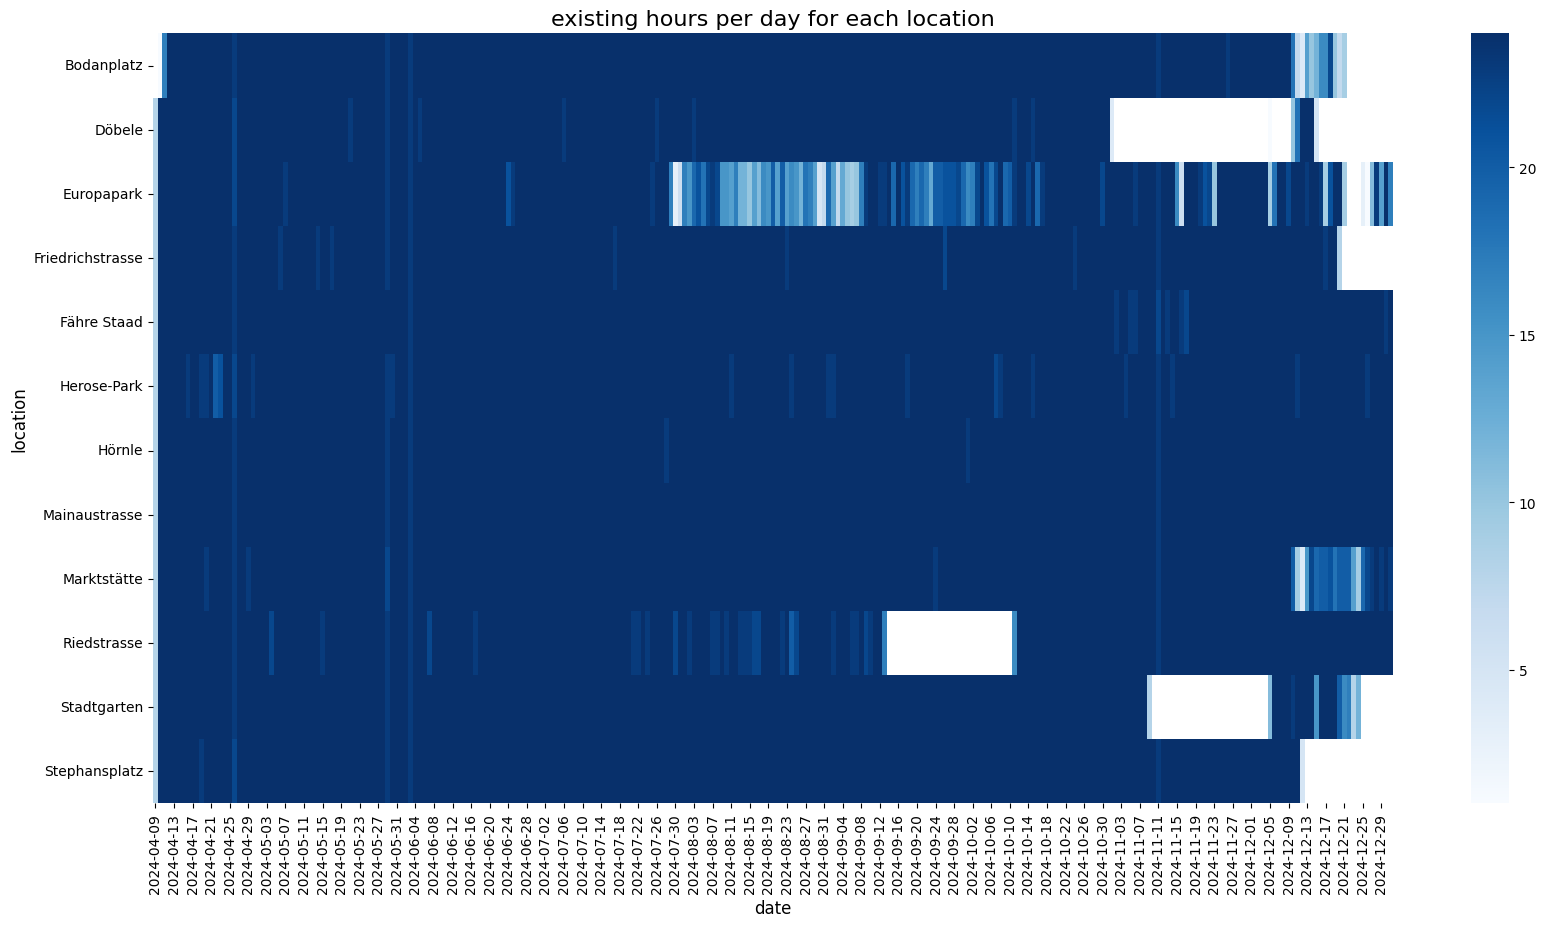

In [42]:
"""
Kommentar: 
Exisiting_combinations_hour ist super als Ansatz finde ich:
"""
#existing_combinations_hour = existing_combinations_hour.to_frame().reset_index(drop=True)

#calculate total number of existing hours per location and day
existing_hours_per_day = existing_combinations_hour.groupby(['name', 'date']).size().reset_index(name='existing_hours') 

#create heatmap
data = existing_hours_per_day.pivot_table(index='name', columns='date', values='existing_hours')
plt.figure(figsize=(20, 10))
sns.heatmap(data, cmap='Blues', vmax=24, annot=False, cbar=True)
plt.title('existing hours per day for each location', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('location', fontsize=12)
plt.xticks(ticks=range(len(data.columns)), labels=data.columns.strftime('%Y-%m-%d'), rotation=90, fontsize=8)
plt.tight_layout()

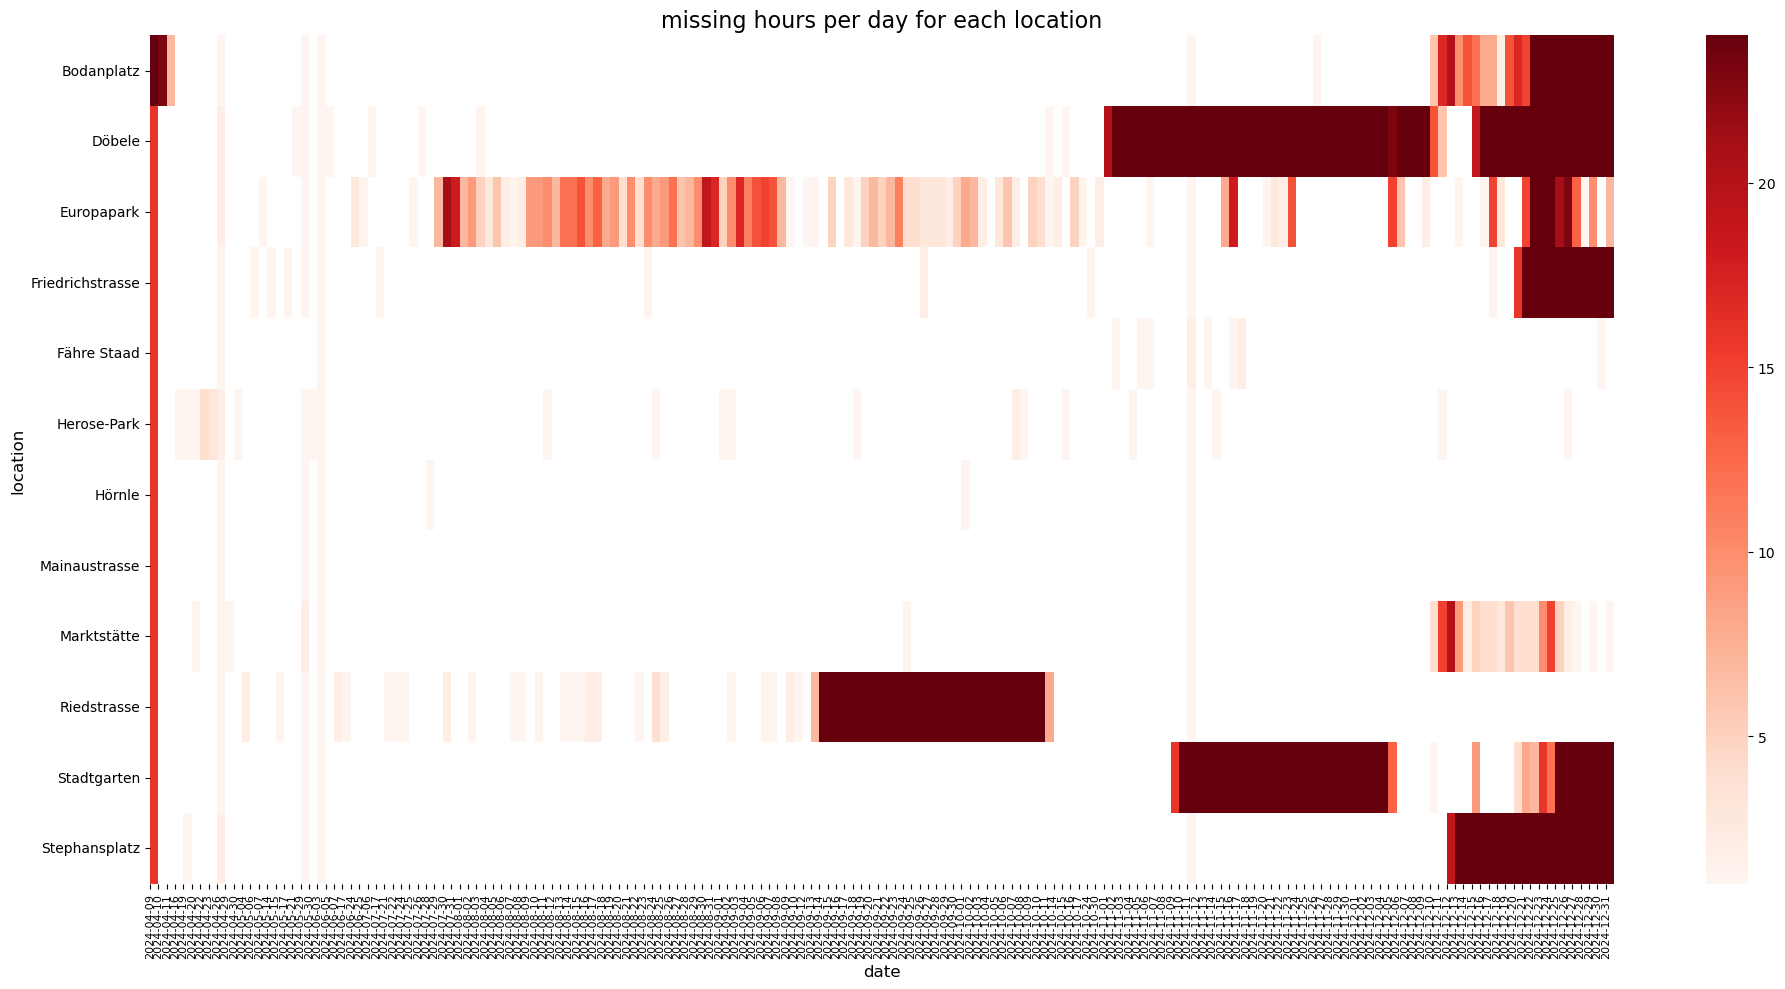

In [12]:
#calculate total number of missing hours per location and day
missing_hours_per_day = missing_hours.groupby(['name', 'date']).size().reset_index(name='missing_hours') 

#create heatmap
data = missing_hours_per_day.pivot_table(index='name', columns='date', values='missing_hours')
plt.figure(figsize=(20, 10))
sns.heatmap(data, cmap='Reds', vmax=24, annot=False, cbar=True)
plt.title('missing hours per day for each location', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('location', fontsize=12)
plt.xticks(ticks=range(len(data.columns)), labels=data.columns.strftime('%Y-%m-%d'), rotation=90, fontsize=8)
plt.tight_layout()


In [13]:
#consequences of missing values?
#finding the warmest day based on median temperature  
max_temperature_day = ws_day.loc[ws_day['temperature'].idxmax()]
max_temperature_day

#europapark (29.3 grad) -> kann nicht sein


name                             Europapark
date                             2024-08-11
atmosphericpressure                   971.0
precipitation                         27.89
relativehumidity                       51.6
temperature                            29.3
winddirection                         103.0
windspeedavg                            1.0
windspeedmax                            1.7
windspeedmin                            0.2
surfacetemperaturewintersense         32.71
temperaturewintersense                29.09
week_of_year                           32.0
Name: 594, dtype: object

In [ ]:
"""
Kommentare:
"""

In [14]:
#check for missing hourly data for europapark on 11/08/24  
missing_hours[(missing_hours["name"] == "Europapark") & 
                                  (missing_hours["date"] == "2024-08-11")]

,name,date,hour
1948,Europapark,2024-08-11,1
1949,Europapark,2024-08-11,2
1950,Europapark,2024-08-11,3
1951,Europapark,2024-08-11,4
1952,Europapark,2024-08-11,7
1953,Europapark,2024-08-11,8
1954,Europapark,2024-08-11,11
1955,Europapark,2024-08-11,12
1956,Europapark,2024-08-11,14
1957,Europapark,2024-08-11,22


In [15]:
#original df: temperature values on 11/08/24 @Europapark
date = ws_hour[ws_hour['date'].astype(str) == '2024-08-11'] 
loc_date = date[date["name"] == "Europapark"]
loc_date

,name,date,hour,atmosphericpressure,precipitation,relativehumidity,temperature,winddirection,windspeedavg,windspeedmax,windspeedmin,surfacetemperaturewintersense,temperaturewintersense,week_of_year
13844,Europapark,2024-08-11,0,974.80,27.89,79.60,21.70,240.0,0.50,0.90,0.10,23.11,20.52,32.0
13845,Europapark,2024-08-11,5,973.90,27.89,90.60,18.20,228.0,0.30,0.40,0.20,19.03,16.93,32.0
13846,Europapark,2024-08-11,6,974.10,27.89,94.10,17.70,251.0,0.20,0.40,0.10,18.71,16.56,32.0
13847,Europapark,2024-08-11,9,974.20,27.89,70.10,23.50,69.0,1.60,2.50,0.20,29.27,25.18,32.0
13848,Europapark,2024-08-11,10,974.10,27.89,63.40,25.20,64.0,0.80,1.30,0.20,32.79,28.82,32.0
13849,Europapark,2024-08-11,13,972.70,27.89,54.10,29.30,168.0,1.00,2.20,0.00,40.09,33.76,32.0
13850,Europapark,2024-08-11,15,971.60,27.89,46.70,31.00,103.0,2.10,3.50,0.30,41.59,33.78,32.0
13851,Europapark,2024-08-11,16,971.05,27.89,43.55,31.55,105.0,1.55,2.85,0.45,41.64,34.46,32.0
13852,Europapark,2024-08-11,17,970.60,27.89,42.90,31.45,41.0,1.60,2.70,0.60,40.37,32.98,32.0
13853,Europapark,2024-08-11,18,970.20,27.89,43.30,31.40,36.0,1.00,1.70,0.10,36.03,32.17,32.0


In [16]:
#Europapark 11.08.24: Nachtstunden fehlen (Stunde 1-8) tagsüber hohe Temperaturen
#Median extrem verzerrt, nichts ableitbar von den Daten

In [17]:
#how many days are fully covered? (at least one measured value per hour)

#count hours per location and date, then filter for 24 hours available
complete_days = ws_hour.groupby(['name', 'date'])['hour'].nunique()
complete_days = complete_days[complete_days == 24].reset_index()

#days where all 12 locations have complete 24-hour data
complete_days = complete_days.groupby('date')['name'].nunique()
complete_days = complete_days[complete_days == 12].reset_index()
complete_days
#aug, sept, nov, dez viele fehlende messungen -> zeitverlauf nicht sinnvoll


,date,name
0,2024-04-12,12
1,2024-04-13,12
2,2024-04-14,12
3,2024-04-15,12
4,2024-04-17,12
...,...,...
87,2024-10-26,12
88,2024-10-27,12
89,2024-10-28,12
90,2024-10-29,12


In [18]:
#Warum fallen Stationen immer wieder aus?
#Möglichkeiten damit umzugehen?

    #Tage mit starkem Ungleichgewicht Tagmessungen/Nachtmessungen filtern?
    #Zeitraum filtern -> haben wir für mehr Tage vollständige Messungen wenn wir die Uhrzeit begrenzen? Zb. Nachmittags wenn es am wärmsten ist?
    #Stationen filtern -> Fokus auf repräsentative Stationen?
    #Fokus auf heißeste Tage -> DWD, nur einzelne (vollständige) Tage beispielhaft plotten, bpsw. heißeste Tage
    

In [19]:
#is there any difference in temperature between locations? 
max_temperature = ws_hour.loc[ws_hour['temperature'].idxmax()]
max_temperature

name                             Stephansplatz
date                                2024-08-11
hour                                        17
atmosphericpressure                     970.35
precipitation                            43.37
relativehumidity                         37.55
temperature                               34.2
winddirection                            307.5
windspeedavg                               0.9
windspeedmax                              1.85
windspeedmin                               0.1
surfacetemperaturewintersense              NaN
temperaturewintersense                     NaN
week_of_year                              32.0
Name: 68677, dtype: object

/Users/maite/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/maite/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


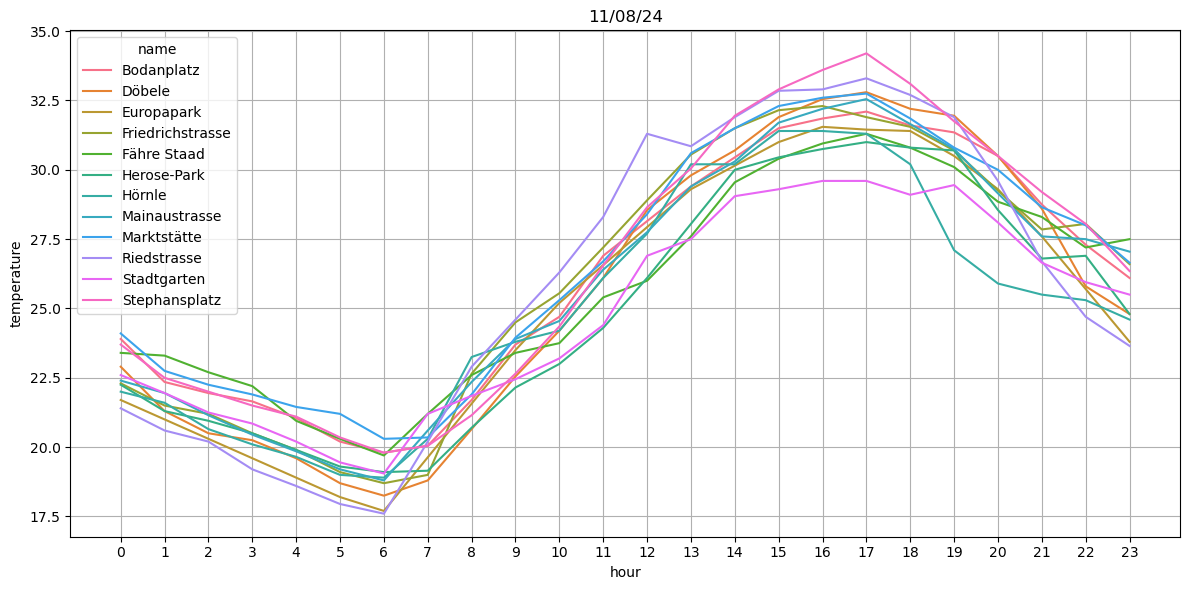

In [26]:
#plot
data_max_temperature = ws_hour[ws_hour['date'].astype(str) == '2024-08-11']

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='temperature', hue='name', data=data_max_temperature)
plt.title(f"11/08/24")
plt.xlabel("hour")
plt.ylabel("temperature")
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()

In [21]:
#another data quality issue: 18 grad bodanplatz um 5uhr morgens im april? hat das jemand mit nach hause genommen?
ws_hour[(ws_hour['date'].astype(str) == '2024-04-11') & (ws_hour['hour'] == 5)]


,name,date,hour,atmosphericpressure,precipitation,relativehumidity,temperature,winddirection,windspeedavg,windspeedmax,windspeedmin,surfacetemperaturewintersense,temperaturewintersense,week_of_year
1,Bodanplatz,2024-04-11,5,983.80,0.89,52.80,18.60,51.0,0.10,0.10,0.00,NaN,NaN,15.0
6003,Döbele,2024-04-11,5,983.70,22.67,95.00,3.20,210.0,0.10,0.20,0.00,NaN,NaN,15.0
11030,Europapark,2024-04-11,5,983.45,51.31,98.44,3.20,220.0,0.55,0.85,0.35,3.70,2.31,15.0
16637,Friedrichstrasse,2024-04-11,5,981.70,13.77,93.44,3.80,50.0,0.20,0.35,0.00,NaN,NaN,15.0
22736,Fähre Staad,2024-04-11,5,983.55,21.02,89.74,4.65,284.5,0.50,1.00,0.25,NaN,NaN,15.0
29116,Herose-Park,2024-04-11,5,983.90,12.65,96.64,4.20,315.5,0.25,0.45,0.15,NaN,NaN,15.0
35478,Hörnle,2024-04-11,5,983.15,0.00,96.40,4.30,267.5,0.55,0.75,0.25,NaN,NaN,15.0
41864,Mainaustrasse,2024-04-11,5,982.75,17.61,95.60,4.05,57.5,0.30,0.60,0.05,NaN,NaN,15.0
48252,Marktstätte,2024-04-11,5,984.10,41.97,87.00,4.95,221.0,0.60,0.95,0.15,5.29,4.22,15.0
54517,Riedstrasse,2024-04-11,5,983.50,0.45,97.00,2.50,110.0,0.40,0.70,0.20,NaN,NaN,15.0


In [22]:
#19.4 grad bodanplatz um 22.00 im april?
ws_hour[(ws_hour['date'].astype(str) == '2024-04-10') & (ws_hour['hour'] ==22)]

,name,date,hour,atmosphericpressure,precipitation,relativehumidity,temperature,winddirection,windspeedavg,windspeedmax,windspeedmin,surfacetemperaturewintersense,temperaturewintersense,week_of_year
0,Bodanplatz,2024-04-10,22,983.40,0.89,52.30,19.40,287.0,0.00,0.10,0.00,NaN,NaN,15.0
5996,Döbele,2024-04-10,22,983.35,22.67,79.09,7.10,217.5,0.10,0.40,0.00,NaN,NaN,15.0
11023,Europapark,2024-04-10,22,983.20,51.31,80.30,6.90,242.5,0.35,0.40,0.10,8.58,5.23,15.0
16630,Friedrichstrasse,2024-04-10,22,981.40,13.77,76.20,7.60,58.0,0.20,0.40,0.10,NaN,NaN,15.0
22729,Fähre Staad,2024-04-10,22,983.35,21.02,71.94,8.05,316.5,0.55,0.85,0.20,NaN,NaN,15.0
29109,Herose-Park,2024-04-10,22,983.50,12.65,74.39,8.00,281.0,0.30,0.70,0.10,NaN,NaN,15.0
35471,Hörnle,2024-04-10,22,982.90,0.00,74.50,7.30,277.0,0.35,0.60,0.05,NaN,NaN,15.0
41857,Mainaustrasse,2024-04-10,22,982.45,17.61,78.24,7.50,158.0,0.25,0.60,0.00,NaN,NaN,15.0
48245,Marktstätte,2024-04-10,22,983.75,41.97,72.44,8.85,48.5,0.25,0.65,0.05,9.22,8.01,15.0
54510,Riedstrasse,2024-04-10,22,983.20,0.45,83.65,6.25,59.0,0.20,0.30,0.10,NaN,NaN,15.0
